In [76]:
#Importamos librerias y leemos los archivos de datos. 

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

from sklearn import tree
from sklearn.metrics import f1_score, make_scorer
import lightgbm as lgb
from sklearn.model_selection import train_test_split



from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate,KFold, RandomizedSearchCV

train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')

test_values = pd.read_csv('test_values.csv', index_col='building_id')
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')

train_values = pd.get_dummies(train_values)
test_values = pd.get_dummies(test_values)

In [77]:
train_values.shape

(260601, 68)

In [78]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


##F1 Scorer

In [79]:
f1 = make_scorer(f1_score , average='micro')

##Feature Engineering

In [80]:
#Geo Level Id 1. 

train_values.geo_level_1_id.describe() 

train_values['geo_level_1_id_less_than_10'] = [1 if (x <= 10) else 0 for x in train_values['geo_level_1_id']]

train_values['geo_level_1_id_10_20'] = [1 if ((x <= 20) & (x > 10))  else 0 \
                                        for x in train_values['geo_level_1_id']]

train_values['geo_level_1_id_higher_than_20'] = [1 if (x > 20) else 0 for x in train_values['geo_level_1_id']]


#Hacemos lo mismo para el set de Test. 


test_values['geo_level_1_id_less_than_10'] = [1 if (x <= 10) else 0 for x in test_values['geo_level_1_id']]

test_values['geo_level_1_id_10_20'] = [1 if ((x <= 20) & (x > 10))  else 0 \
                                        for x in test_values['geo_level_1_id']]

test_values['geo_level_1_id_higher_than_20'] = [1 if (x > 20) else 0 for x in test_values['geo_level_1_id']]

In [81]:
#Geo Level Id 2. 

train_values.geo_level_2_id.describe() 

train_values['geo_level_2_id_less_than_500'] = [1 if (x <= 500) else 0 for x in train_values['geo_level_2_id']]

train_values['geo_level_2_id_500_1000'] = [1 if ((x <= 1000) & (x > 500)) \
                                           else 0 for x in train_values['geo_level_2_id']]

train_values['geo_level_2_id_higher_than_1000'] = [1 if (x > 1000) else 0 for x in train_values['geo_level_2_id']]


#Hacemos lo mismo para el set de Test.


test_values['geo_level_2_id_less_than_500'] = [1 if (x <= 500) else 0 for x in test_values['geo_level_2_id']]

test_values['geo_level_2_id_500_1000'] = [1 if ((x <= 1000) & (x > 500)) \
                                           else 0 for x in test_values['geo_level_2_id']]

test_values['geo_level_2_id_higher_than_1000'] = [1 if (x > 1000) else 0 for x in test_values['geo_level_2_id']]

In [82]:

#Geo Level Id 3. 

train_values.geo_level_3_id.describe() 

train_values['geo_level_3_id_less_than_4000'] = [1 if (x <= 4000) else 0 for x in train_values['geo_level_3_id']]

train_values['geo_level_3_id_4000_8000'] = [1 if ((x <= 8000) & (x > 4000))  \
                                            else 0 for x in train_values['geo_level_3_id']]

train_values['geo_level_3_id_higher_than_8000'] = [1 if (x > 8000) else 0 for x in train_values['geo_level_3_id']]



#Hacemos lo mismo para el set de Test.


test_values['geo_level_3_id_less_than_4000'] = [1 if (x <= 4000) else 0 for x in test_values['geo_level_3_id']]

test_values['geo_level_3_id_4000_8000'] = [1 if ((x <= 8000) & (x > 4000))  \
                                            else 0 for x in test_values['geo_level_3_id']]

test_values['geo_level_3_id_higher_than_8000'] = [1 if (x > 8000) else 0 for x in test_values['geo_level_3_id']]

In [83]:
#Count Floors Pre Eq.

count_floors_pre_eq_mean = train_values['count_floors_pre_eq'].mean()

train_values['count_floor_pre_eq_higher_than_mean'] = [1 if\
                    (x > count_floors_pre_eq_mean) else 0 for x in train_values['count_floors_pre_eq']] 



#Hacemos lo mismo para el set de Test.


count_floors_pre_eq_mean = test_values['count_floors_pre_eq'].mean()

test_values['count_floor_pre_eq_higher_than_mean'] = [1 if\
                    (x > count_floors_pre_eq_mean) else 0 for x in test_values['count_floors_pre_eq']]

In [84]:
#Age. 

train_values.age.describe()

train_values['age_less_than_20'] = [1 if (x <= 20) else 0 for x in train_values['age']]

train_values['age_20_50'] = [1 if ((x <= 50) & (x > 20))  else 0 for x in train_values['age']]

train_values['age_higher_than_50'] = [1 if (x > 50) else 0 for x in train_values['age']]



#Hacemos lo mismo para el set de Test.


test_values['age_less_than_20'] = [1 if (x <= 20) else 0 for x in test_values['age']]

test_values['age_20_50'] = [1 if ((x <= 50) & (x > 20))  else 0 for x in test_values['age']]

test_values['age_higher_than_50'] = [1 if (x > 50) else 0 for x in test_values['age']]

In [85]:
#Area and Height Percentage. Volume Percentage. 

train_values['volume_percetage'] = (train_values['area_percentage'] * train_values['height_percentage'])



#Hacemos lo mismo para el set de Test.


test_values['volume_percetage'] = (test_values['area_percentage'] * test_values['height_percentage'])

In [86]:
#Materiales.

train_values['weak_superstructure'] = np.where( ( (train_values.has_superstructure_mud_mortar_stone == 1) |  \
                                       (train_values.has_superstructure_adobe_mud == 1) \
                                           | (train_values.has_superstructure_stone_flag == 1)  \
                                           | (train_values.has_superstructure_mud_mortar_brick == 1)   \
                                            | (train_values.has_superstructure_timber == 1)   \
                                            | (train_values.has_superstructure_bamboo == 1)    ), 1, 0)

train_values['strong_superstructure'] = np.where( ( (train_values.has_superstructure_cement_mortar_brick == 1) | \
                                       (train_values.has_superstructure_rc_non_engineered == 1) \
                                           | (train_values.has_superstructure_rc_engineered == 1)  ), 1, 0)


#Hacemos lo mismo para el set de Test.


test_values['weak_superstructure'] = np.where( ( (test_values.has_superstructure_mud_mortar_stone == 1) |  \
                                       (test_values.has_superstructure_adobe_mud == 1) \
                                           | (test_values.has_superstructure_stone_flag == 1)  \
                                           | (test_values.has_superstructure_mud_mortar_brick == 1)   \
                                            | (test_values.has_superstructure_timber == 1)   \
                                            | (test_values.has_superstructure_bamboo == 1)    ), 1, 0)

test_values['strong_superstructure'] = np.where( ( (test_values.has_superstructure_cement_mortar_brick == 1) | \
                                       (test_values.has_superstructure_rc_non_engineered == 1) \
                                           | (test_values.has_superstructure_rc_engineered == 1)  ), 1, 0)

In [87]:
#Usos secundarios.

train_values['cantidad_usos_secundarios'] = train_values['has_secondary_use_agriculture'] + \
                                             train_values['has_secondary_use_hotel'] + \
                                              train_values['has_secondary_use_rental'] + \
                                              train_values['has_secondary_use_institution'] + \
                                             train_values['has_secondary_use_school'] + \
                                                train_values['has_secondary_use_industry'] + \
                                             train_values['has_secondary_use_health_post'] + \
                                                train_values['has_secondary_use_gov_office'] + \
                                                train_values['has_secondary_use_use_police'] + \
                                                train_values['has_secondary_use_other']


#Hacemos lo mismo para el set de Test.


test_values['cantidad_usos_secundarios'] = test_values['has_secondary_use_agriculture'] + \
                                             test_values['has_secondary_use_hotel'] + \
                                              test_values['has_secondary_use_rental'] + \
                                              test_values['has_secondary_use_institution'] + \
                                             test_values['has_secondary_use_school'] + \
                                                test_values['has_secondary_use_industry'] + \
                                             test_values['has_secondary_use_health_post'] + \
                                                test_values['has_secondary_use_gov_office'] + \
                                                test_values['has_secondary_use_use_police'] + \
                                                test_values['has_secondary_use_other']

##Tuning de Hiperparametros

In [88]:
X=train_values
y=train_labels

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
parameters = {
              'num_leaves':[32],
             'learning_rate' :[0.1],
              'max_depth': [6],
              'num_iteration' : [3000]
            }

In [70]:
%%time

kf=KFold(n_splits=2,shuffle=True)

gds=GridSearchCV(estimator = lgb.LGBMClassifier(n_estimators=3000, n_jobs=6), param_grid = parameters, cv = kf, scoring = f1)

gds.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


CPU times: user 24min 59s, sys: 1min 59s, total: 26min 58s
Wall time: 14min 34s


In [71]:
gds.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'num_iteration': 3000, 'num_leaves': 32}

##Training

In [90]:
model = lgb.LGBMClassifier(num_iterations=3000, n_jobs=6, num_leaves=32, max_depth=6)
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=6, num_iterations=3000, num_leaves=32,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [91]:
print(f1_score(y_train, model.predict(X_train), average='micro'))
print(f1_score(y_test, model.predict(X_test), average='micro'))

0.8112193016116653
0.8116690009784924


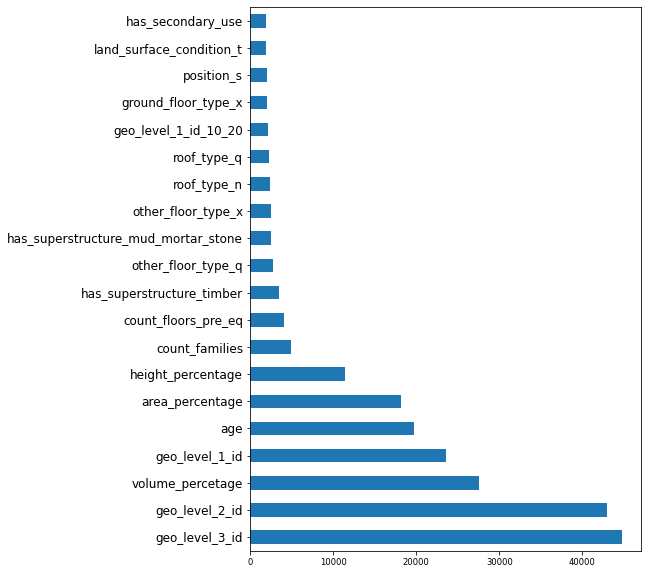

In [92]:
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(20).plot(kind='barh', figsize=(7,10))

##Submission

In [93]:
prediccionesFinales = model.predict(test_values)

In [94]:
submission = pd.DataFrame(data=prediccionesFinales,
                          columns=submission_format.columns,
                          index=submission_format.index)
submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [95]:
submission.to_csv('submissionLightGBM.csv')